In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression  # Reemplaza con tu modelo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# CARGA DEL DATASET

In [2]:
data = pd.read_csv("NY-House-Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
data.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS  BATH  PROPERTYSQFT  \
0     315000     2  2.00       1400.00   
1  195000000     7 10.00      17545.00   
2     260000     4  2.00       2015.00   
3      69000     3  1.00        445.00   
4   55000000     7  2.37      14175.00   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

   LATITUDE  LONGITUDE  
0     40.76     -73.97  
1     40.77     -73.98  
2     40.54     -74.20  
3     40.76     -73.97  
4     40.77     -73.97

In [5]:
data.nunique()

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

# ANALISIS DE DATOS EXPLORATORIO 

[Text(0.5, 1.0, 'By BATH')]

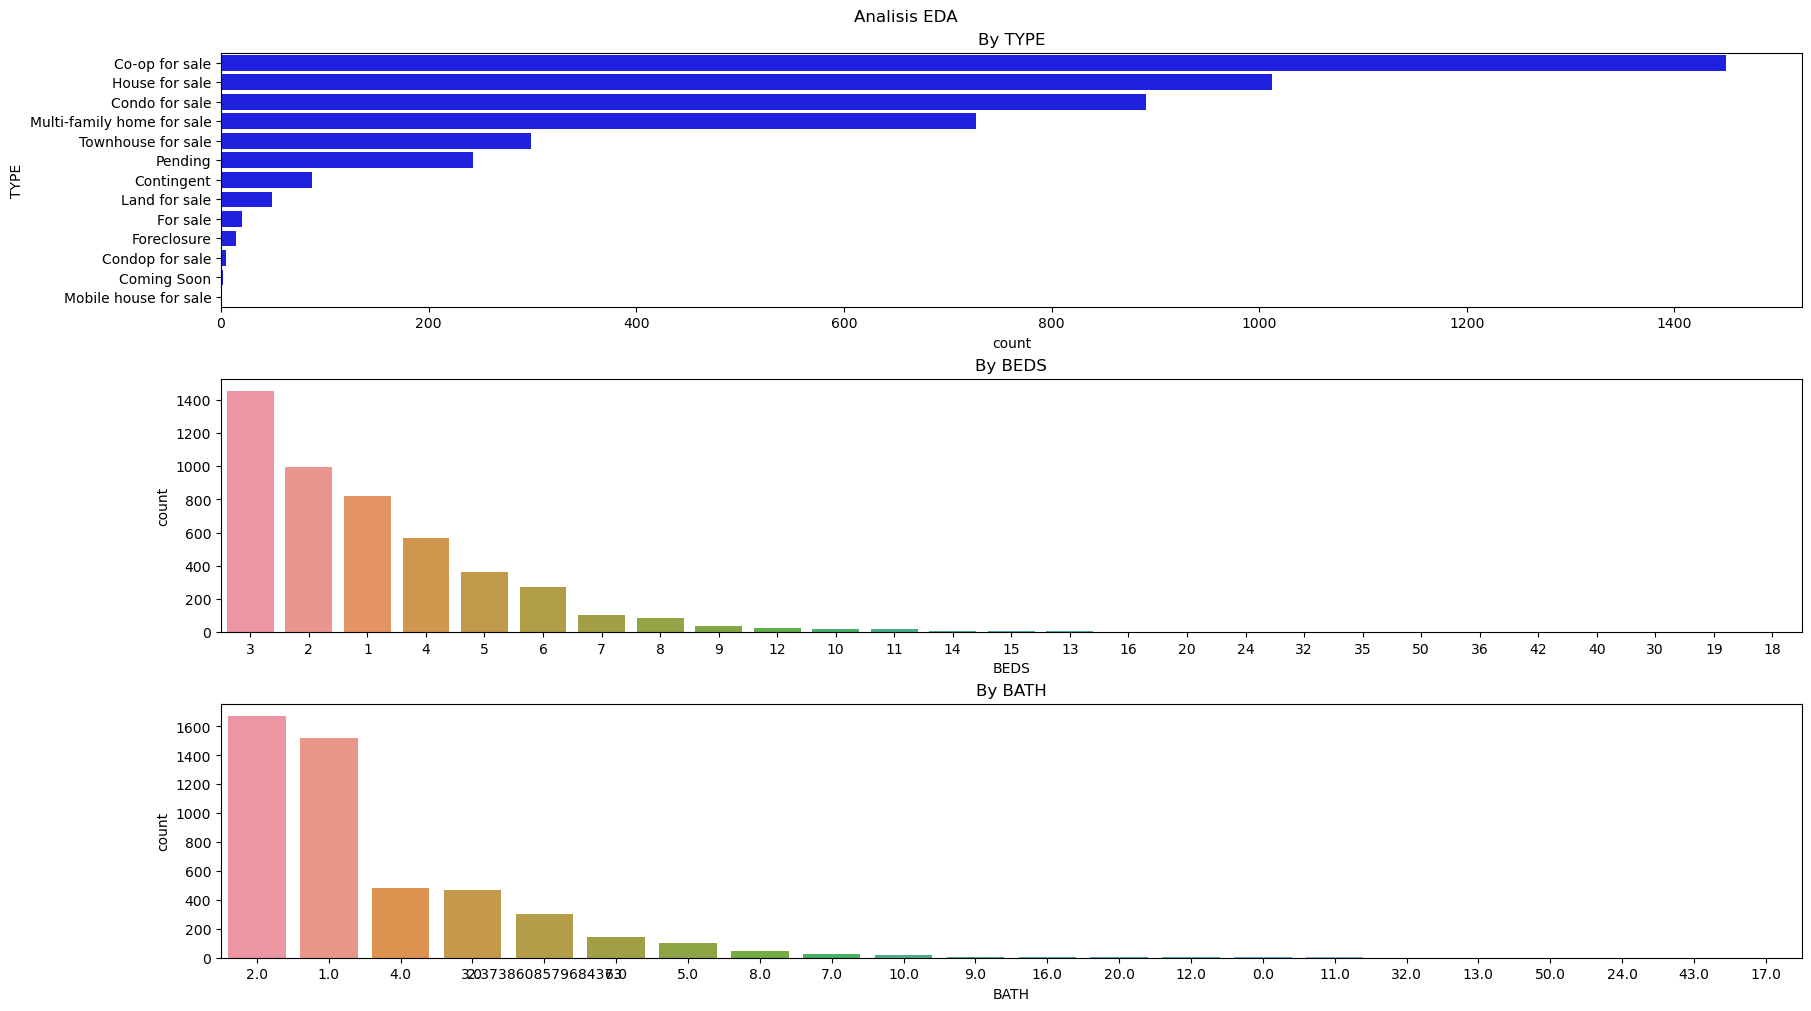

In [6]:
fig, axes = plt.subplots( 3, figsize=(18, 10),constrained_layout=True)

fig.suptitle('Analisis EDA')

sns.countplot(ax=axes[0],data=data,y="TYPE",color = "blue", order = data['TYPE'].value_counts().index ).set(title="By TYPE")
sns.countplot(ax=axes[1],data=data,x= "BEDS", order = data['BEDS'].value_counts().index).set(title="By BEDS")
sns.countplot(ax=axes[2],data=data,x="BATH", order = data['BATH'].value_counts().index).set(title="By BATH")


In [7]:
# algunas instancias son las mismas pero con diferente nombre
data["LOCALITY"] = np.where(data["LOCALITY"]== "The Bronx","Bronx County",data["LOCALITY"])
data["LOCALITY"] = np.where(data["LOCALITY"]== "Queens","Queens County",data["LOCALITY"])

[Text(0.5, 1.0, 'TOP 20 BROKERTITLE')]

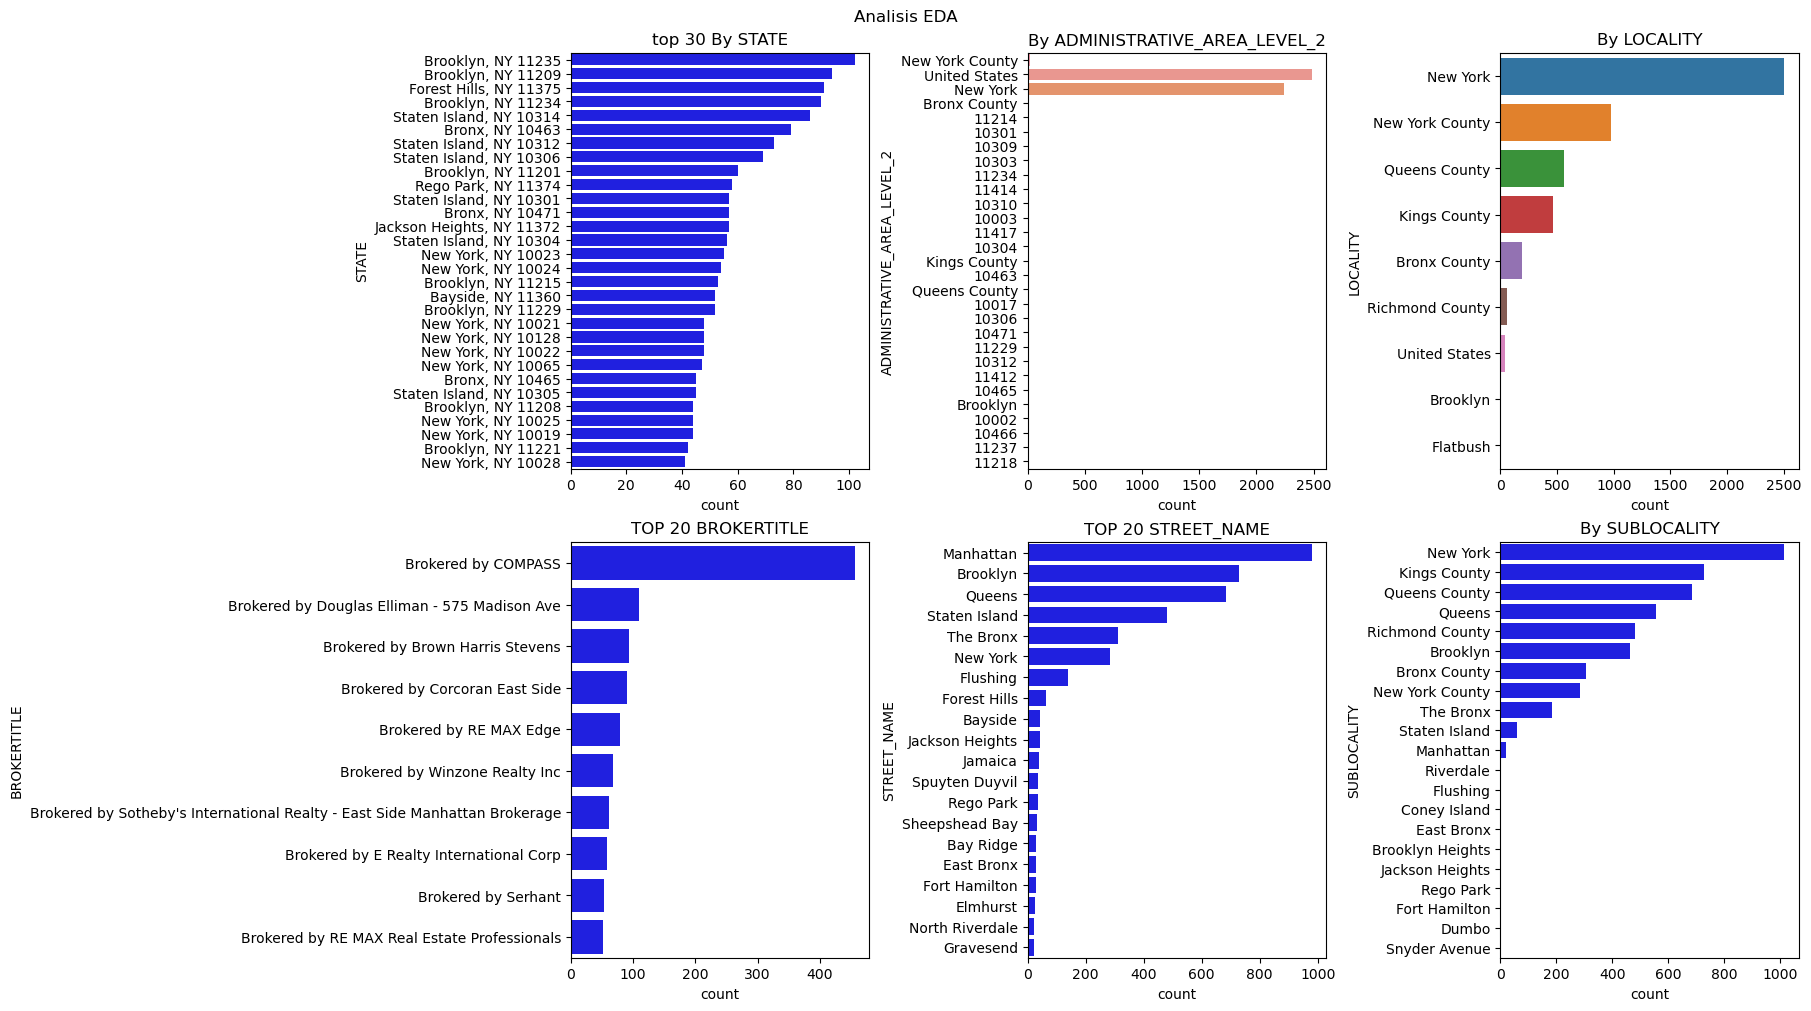

In [8]:
fig, axes = plt.subplots( 2,3, figsize=(18, 10),constrained_layout=True)

fig.suptitle('Analisis EDA')



sns.countplot(ax=axes[0,0],data=data,y="STATE", order = data["STATE"].value_counts().index[:30],color= "b").set(title="top 30 By STATE")
sns.countplot(ax=axes[0,1],data=data,y="ADMINISTRATIVE_AREA_LEVEL_2").set(title="By ADMINISTRATIVE_AREA_LEVEL_2")
sns.countplot(ax=axes[0,2],data=data,y="LOCALITY", order = data["LOCALITY"].value_counts().index).set(title="By LOCALITY")
sns.countplot(ax=axes[1,2],data=data,y="SUBLOCALITY", color = "b",order = data["SUBLOCALITY"].value_counts().index).set(title="By SUBLOCALITY")
sns.countplot(ax=axes[1,1],data=data,order = data["STREET_NAME"].value_counts().index[:20],y="STREET_NAME",color  = "b").set(title="TOP 20 STREET_NAME")
sns.countplot(ax=axes[1,0],data=data,order = data["BROKERTITLE"].value_counts().index[:10],y="BROKERTITLE",color  = "b").set(title="TOP 20 BROKERTITLE")



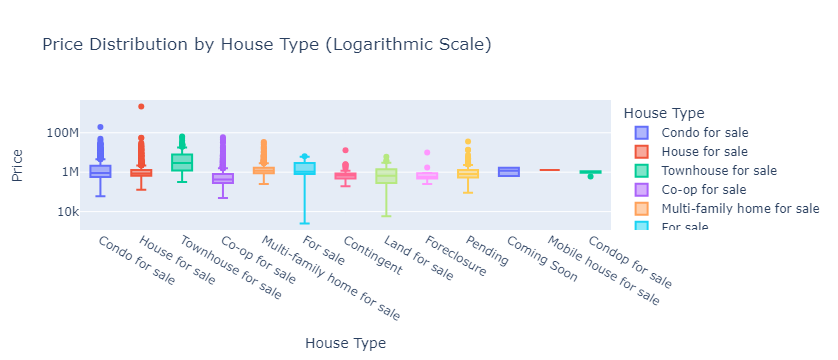

In [9]:
box_plot_log = px.box(data, x='TYPE', y='PRICE', color='TYPE' ,title='Price Distribution by House Type (Logarithmic Scale)',
                      labels={'TYPE': 'House Type', 'PRICE': 'Price'},
                      log_y=True)  
box_plot_log.show()

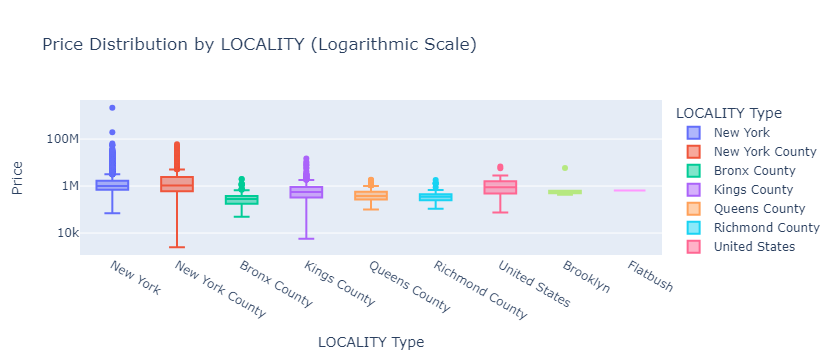

In [10]:
box_plot_log = px.box(data, x='LOCALITY', y='PRICE', color='LOCALITY' ,title='Price Distribution by LOCALITY (Logarithmic Scale)',
                      labels={'LOCALITY': 'LOCALITY Type', 'PRICE': 'Price'},
                      log_y=True)  
box_plot_log.show()

## PRECIO MEDIO, MAXIMO y MINIMO por LOCALITY

In [11]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
subset = data.groupby(["TYPE","LOCALITY"]).agg(MEDIA=('PRICE', 'mean'),
                                           MIN=('PRICE', 'min'),
                                           MAX=('PRICE', 'max'))
subset.reset_index(inplace  = True)

In [12]:
subset.head()

TYPE         LOCALITY        MEDIA     MIN       MAX
0  Co-op for sale     Bronx County   288,848.24   49500   1295000
1  Co-op for sale         Brooklyn   612,000.00  599000    625000
2  Co-op for sale     Kings County   449,623.30  155000   2995000
3  Co-op for sale         New York 1,777,959.95   69900  32000000
4  Co-op for sale  New York County 1,976,040.95  149000  60000000

<AxesSubplot: xlabel='MEDIA', ylabel='LOCALITY'>

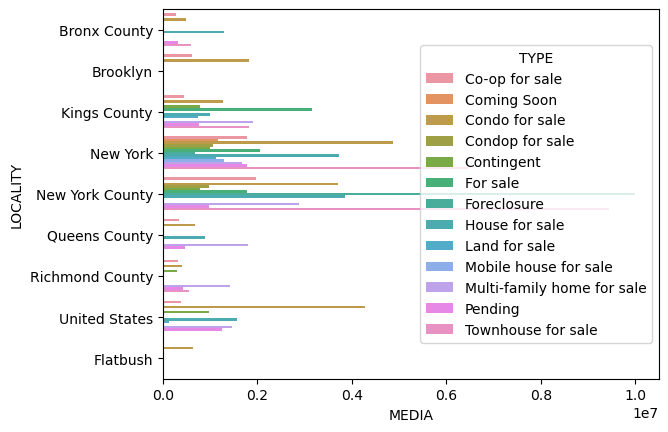

In [13]:
sns.barplot(data = subset, x= "MEDIA",y="LOCALITY",hue="TYPE")

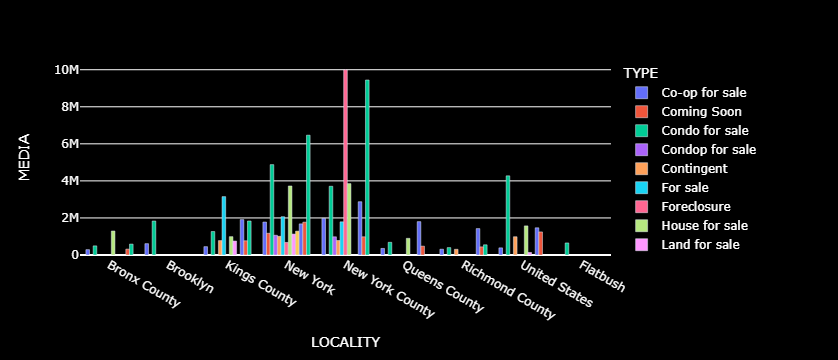

In [14]:
# Crear el gráfico con Plotly Express
fig = px.bar(subset, y='MEDIA', x='LOCALITY', color='TYPE', orientation='v', barmode='group')
# Establecer el color de fondo a negro
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black',
    'font_color': 'white'  # Cambiar el color del texto a blanco para mayor visibilidad
})
# Mostrar el gráfico
fig.show()

In [15]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TYPE      58 non-null     object 
 1   LOCALITY  58 non-null     object 
 2   MEDIA     58 non-null     float64
 3   MIN       58 non-null     int64  
 4   MAX       58 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ KB


In [16]:
subset.nunique()

TYPE        13
LOCALITY     9
MEDIA       58
MIN         56
MAX         57
dtype: int64

## PRECIO MINIMO,MAXIMO Y MEDIO DEL TIPO DE VIVIENDA POR LOCALITY

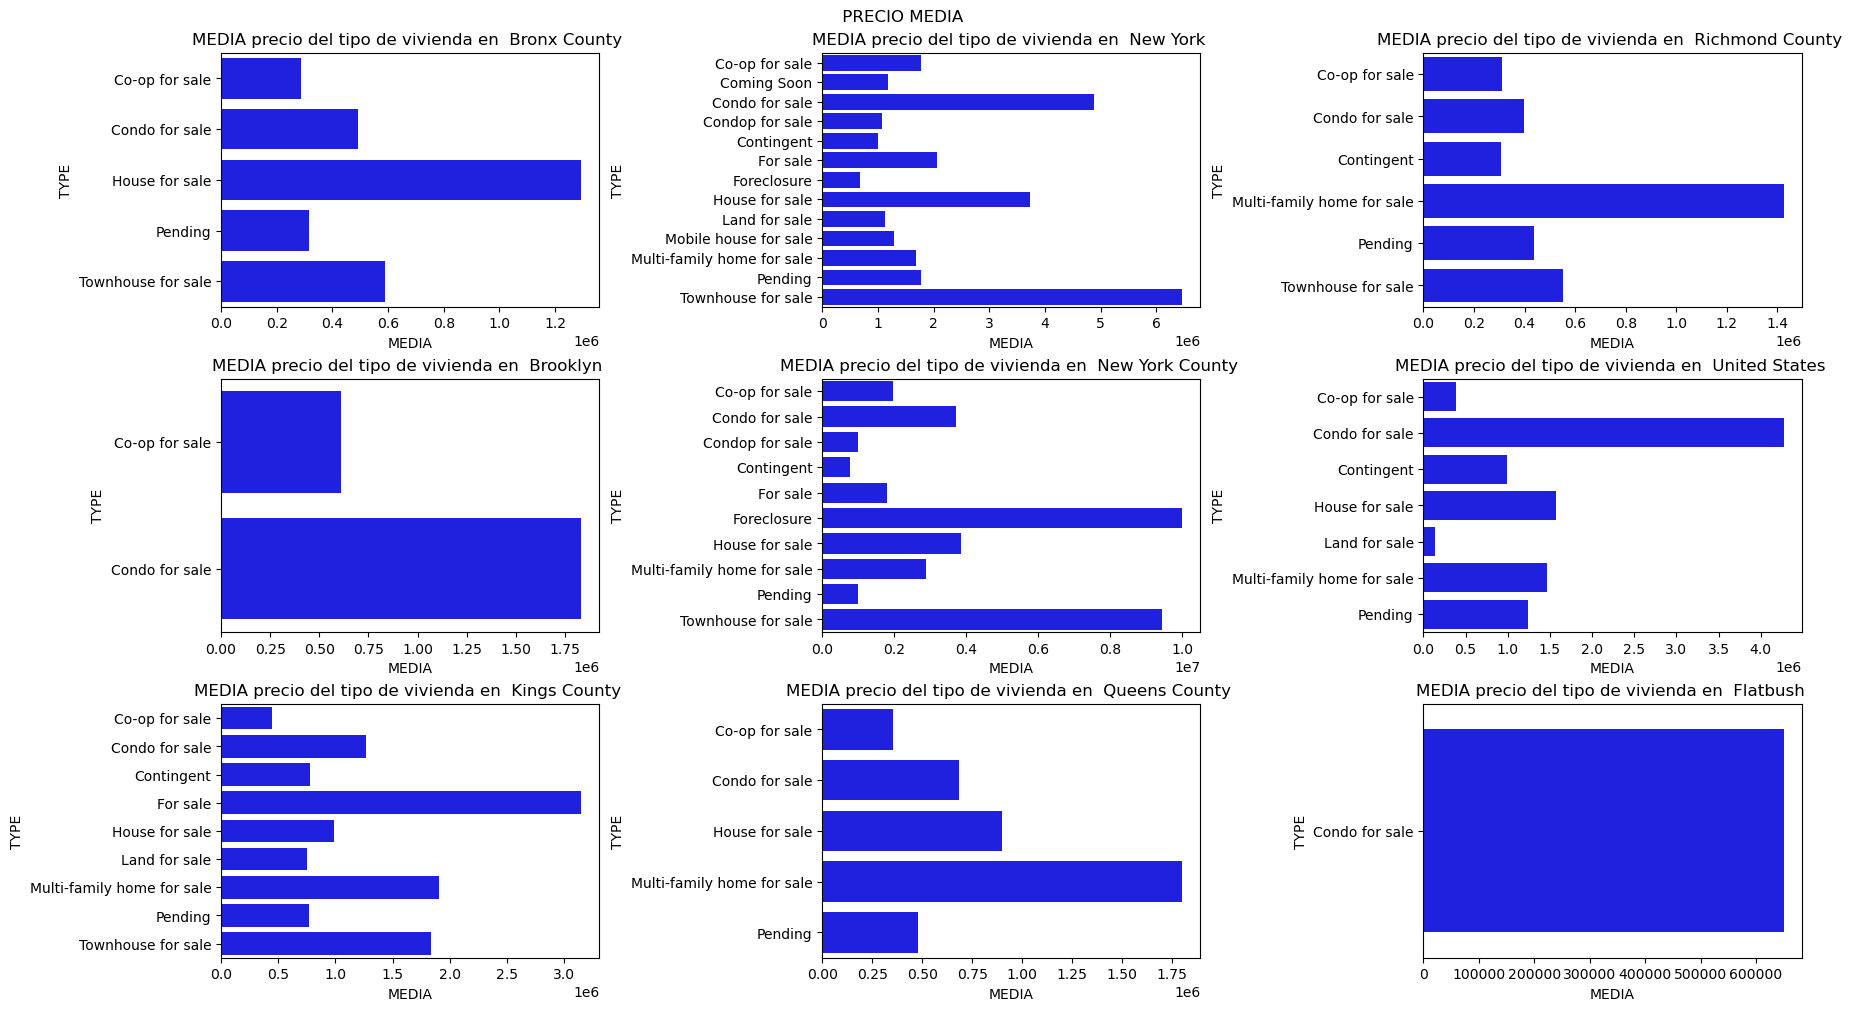

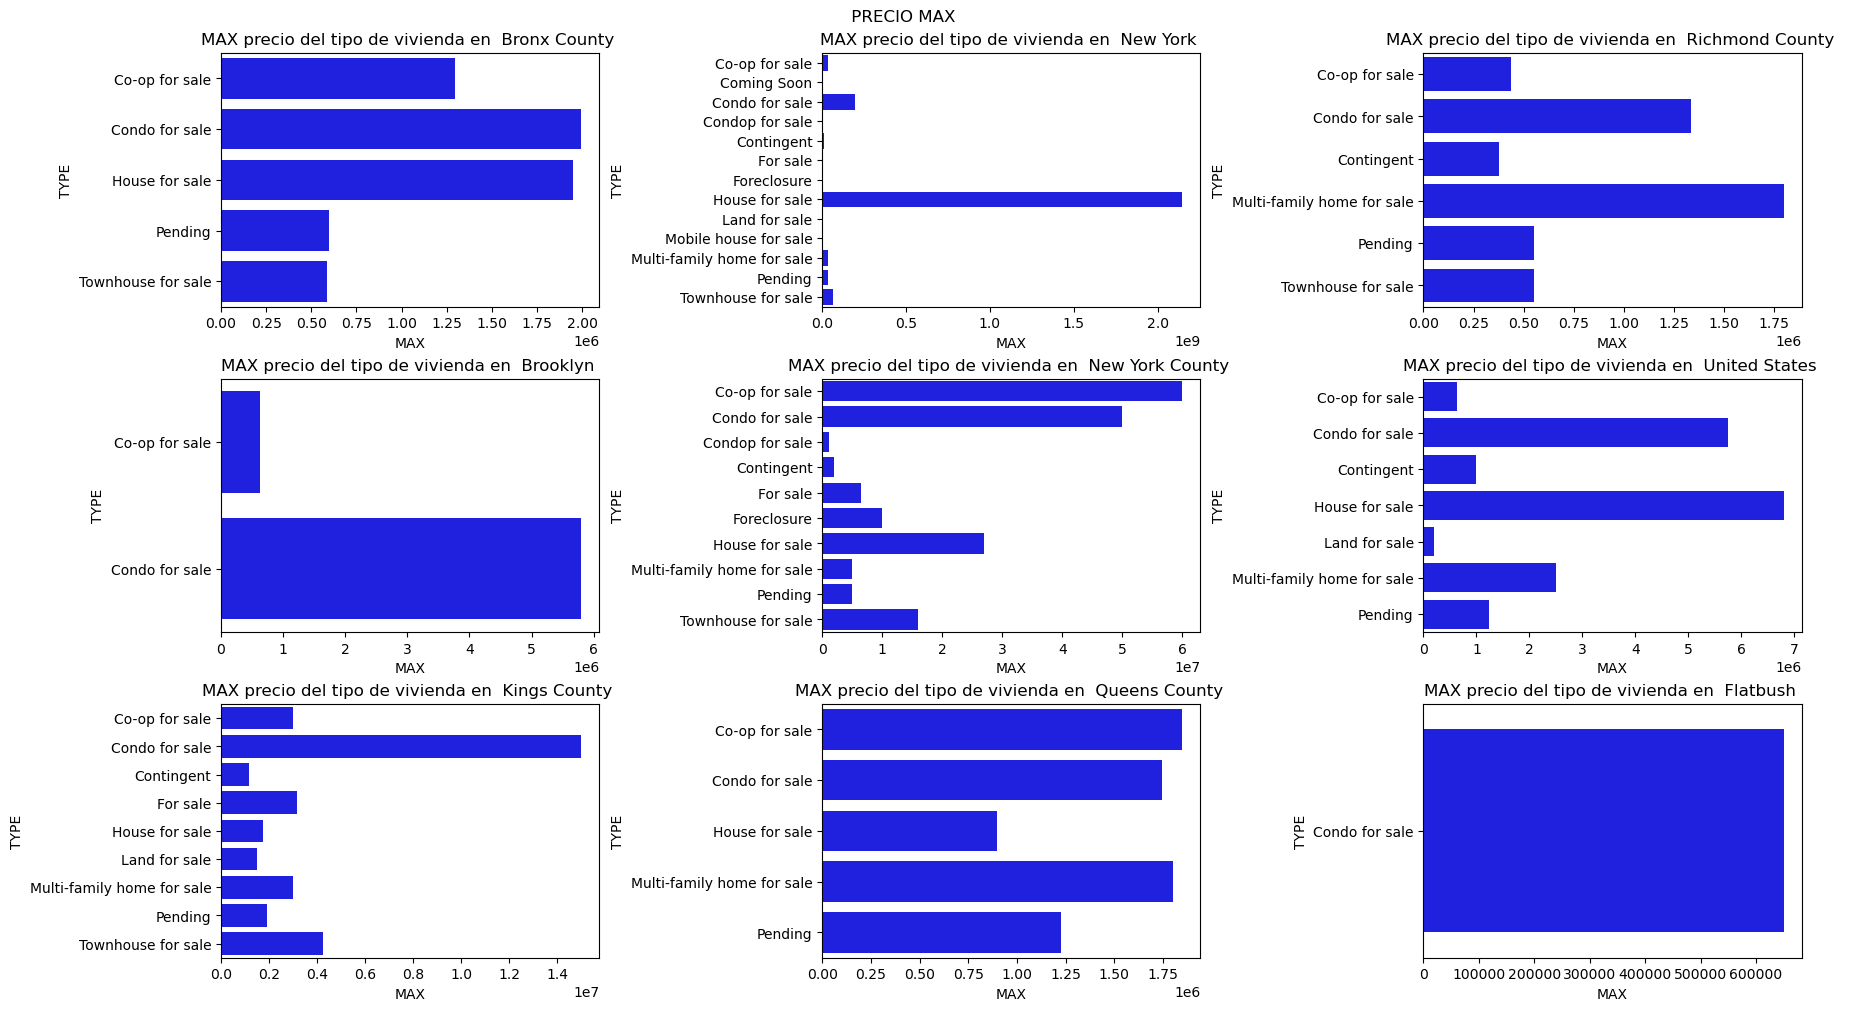

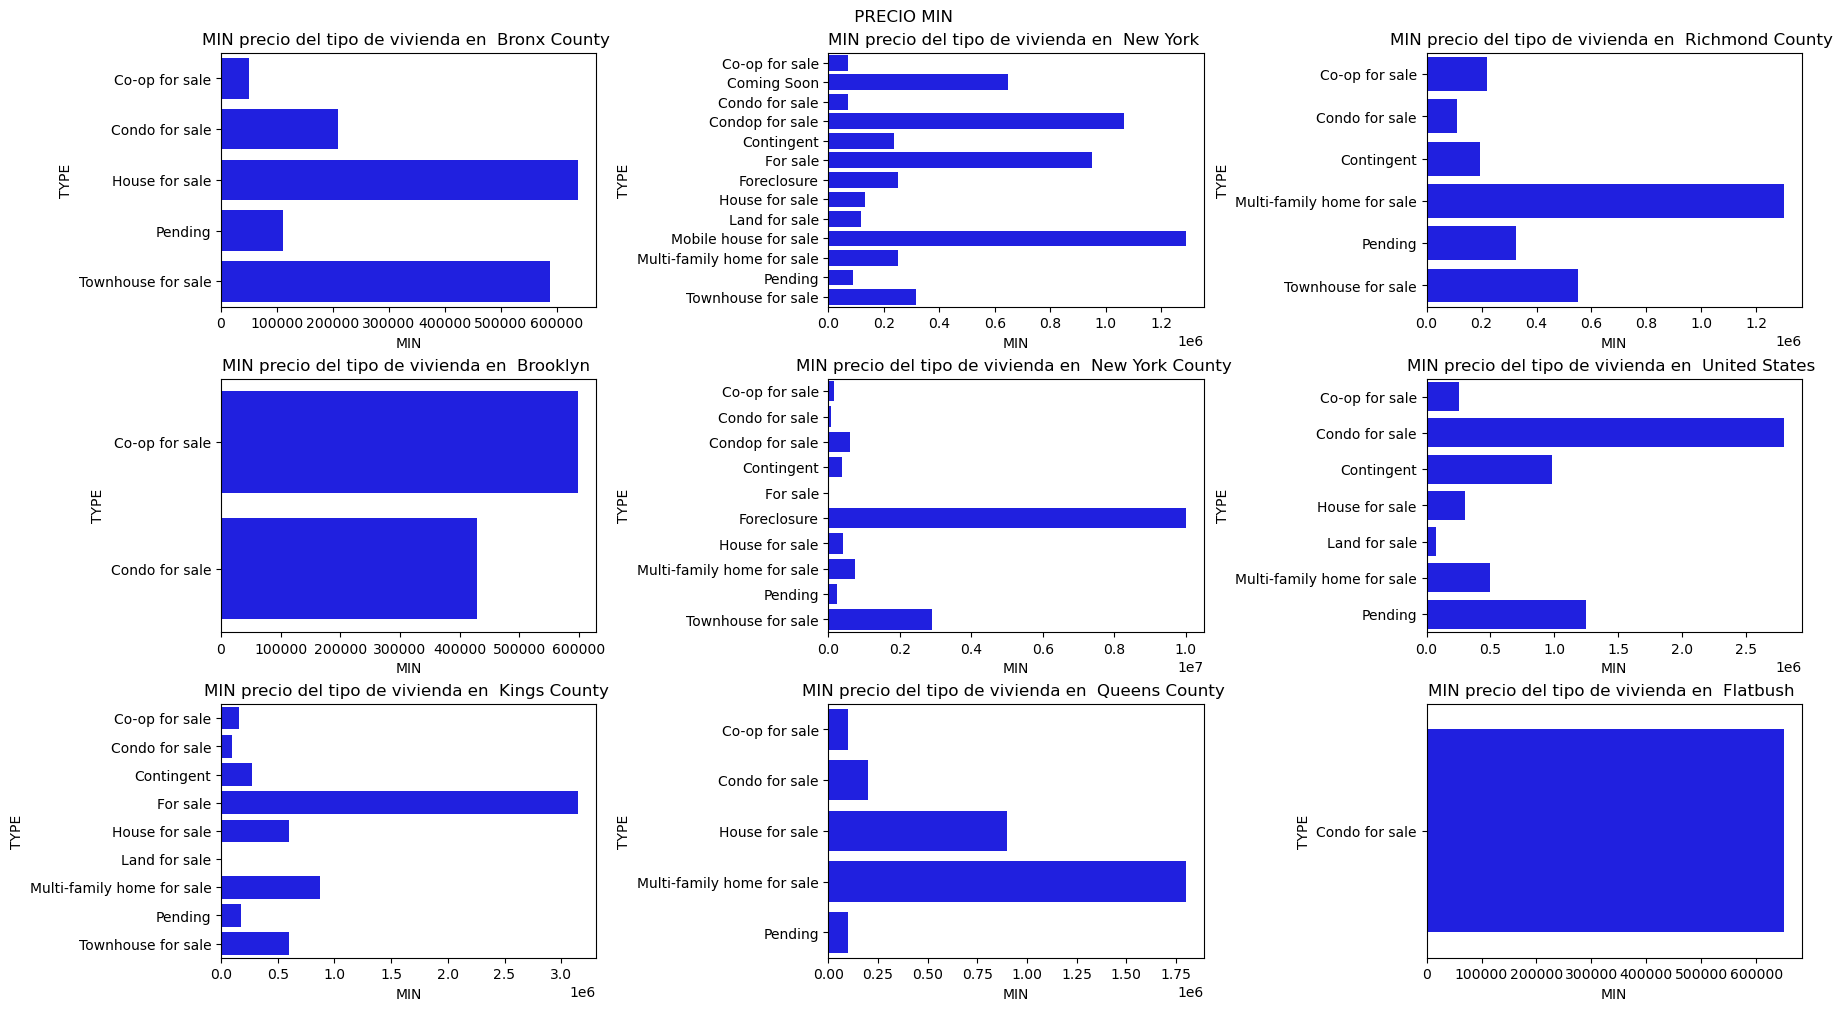

In [17]:
for w in ["MEDIA","MAX","MIN"]:
    fig, axes = plt.subplots( 3,3, figsize=(18, 10),constrained_layout=True)

    fig.suptitle(f' PRECIO {w}  ')
    columna = 0
    fila = 0
    for i, locality in enumerate(subset.LOCALITY.unique()):
        sub = subset[subset["LOCALITY"] == locality]

        sns.barplot(ax=axes[fila, columna], data=sub, y="TYPE", x=w, color="b").set(
            title=f"{w} precio del tipo de vivienda en  {locality} "
        )

        fila = fila + 1
        if fila == 3:
            fila = 0
            columna += 1

    # Mostrar el gráfico
    plt.show()

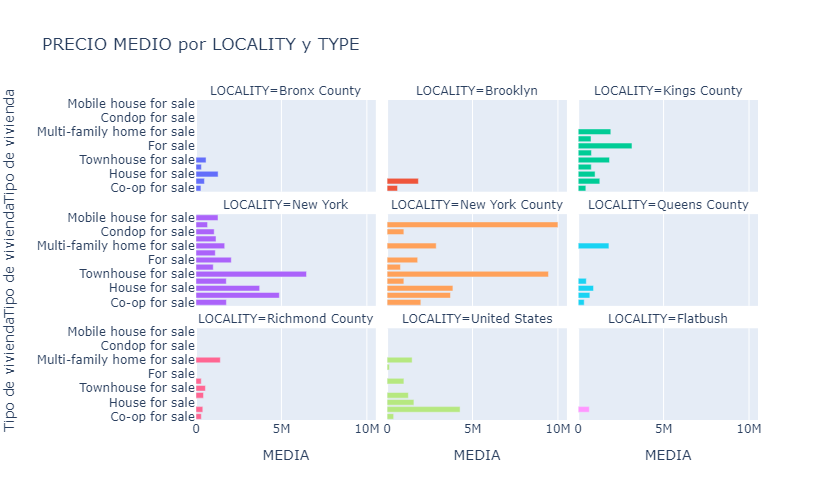

In [18]:


fig = px.bar(subset, x="MEDIA", y="TYPE", color="LOCALITY",
             facet_col="LOCALITY", facet_col_wrap=3,
             labels={w: f" Precio MEDIO", "TYPE": "Tipo de vivienda"},
             title=f'                           PRECIO MEDIO por LOCALITY y TYPE ')

# Actualizar el diseño del gráfico
fig.update_layout(height=500, showlegend=False)

# Mostrar el gráfico
fig.show()

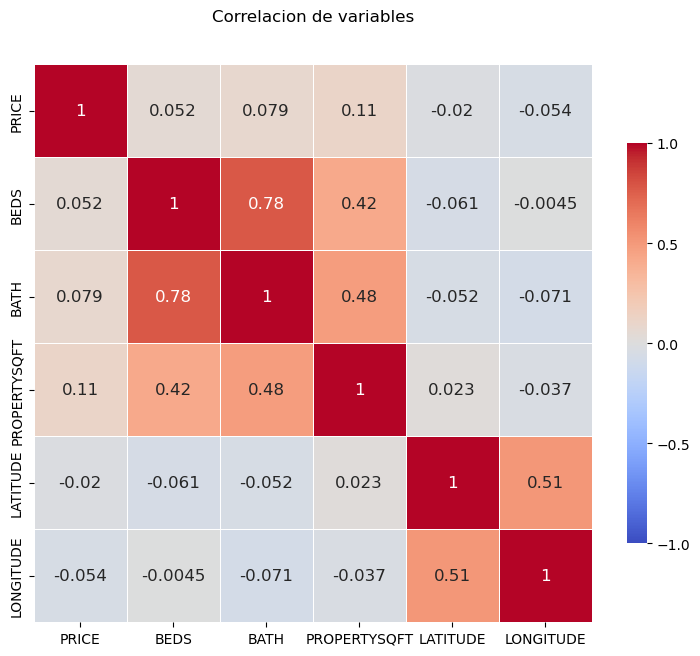

In [19]:
f, ax = plt.subplots(figsize=(9, 13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,
            square = True,
                  linewidths = .5,
                  cmap = 'coolwarm',
                  cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                  annot_kws = {'size': 12}).set(title= f"Correlacion de variables\n\n ")
plt.show()

In [20]:
data.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

# LIMPIEZA DE DATOS

In [21]:
# compruebo datos duplicados
data.duplicated().sum()

214

In [22]:
# elimino datos duplicados
data = data.drop_duplicates().copy()

In [23]:
data.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS  BATH  PROPERTYSQFT  \
0     315000     2  2.00      1,400.00   
1  195000000     7 10.00     17,545.00   
2     260000     4  2.00      2,015.00   
3      69000     3  1.00        445.00   
4   55000000     7  2.37     14,175.00   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

   LATITUDE  LONGITUDE  
0     40.76     -73.97  
1     40.77     -73.98  
2     40.54     -74.20  
3     40.76     -73.97  
4     40.77     -73.97

In [24]:
data["LOCALITY"].value_counts()

New York           2395
New York County     930
Queens County       542
Kings County        442
Bronx County        176
Richmond County      58
United States        37
Brooklyn              6
Flatbush              1
Name: LOCALITY, dtype: int64

In [25]:
data = data[data["LOCALITY"]!= "Flatbush"].copy()

In [26]:
l = LabelEncoder()
columns_to_encode = ["TYPE","BEDS","BATH","STATE","ADMINISTRATIVE_AREA_LEVEL_2","LOCALITY","SUBLOCALITY","STREET_NAME"]

# Iterar sobre las columnas y aplicar la transformación
for column in columns_to_encode:
    data[column+'_encoded'] = l.fit_transform(data[column])


In [27]:
data.head(2)

BROKERTITLE            TYPE      PRICE  \
0  Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale     315000   
1                          Brokered by Serhant  Condo for sale  195000000   

   BEDS  BATH  PROPERTYSQFT  \
0     2  2.00      1,400.00   
1     7 10.00     17,545.00   

                                             ADDRESS               STATE  \
0                               2 E 55th St Unit 803  New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...  New York, NY 10019   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   

  ADMINISTRATIVE_AREA_LEVEL_2  ... LATITUDE LONGITUDE TYPE_encoded  \
0             New York County  ...    40.76    -73.97            2   
1               United States  ...    40.77    -73.98            2   

  BEDS_encoded BATH_encoded  STATE_encoded  \
0            1            2            207   
1            6           11            205   

   ADMINISTRATIVE_AREA_LEVEL_2_encoded  LOCALITY_encoded  SUBLOCALITY_encoded  \
0                                   25                 3                   10   
1                                   27                 3                   12   

   STREET_NAME_encoded  
0                   55  
1                  116  

[2 rows x 25 columns]

# PREDICCION PRECIO por LOCALITY

In [28]:
X = data[["TYPE_encoded","BEDS_encoded","BATH_encoded","STATE_encoded","ADMINISTRATIVE_AREA_LEVEL_2_encoded",
          "LOCALITY_encoded","SUBLOCALITY_encoded","STREET_NAME_encoded","PROPERTYSQFT"]]

y = data["PRICE"]

In [29]:
def remove_outliers(df, column_name):
    # Calcula el rango intercuartílico (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define los límites inferior y superior para identificar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filtra el DataFrame para eliminar outliers
    df_filtered = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
    
    return df_filtered

In [30]:
data["LOCALITY"].value_counts()

New York           2395
New York County     930
Queens County       542
Kings County        442
Bronx County        176
Richmond County      58
United States        37
Brooklyn              6
Name: LOCALITY, dtype: int64

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
modelLZ=LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models=modelLZ.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [17:13<00:00, 24.61s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 3668, number of used features: 9
[LightGBM] [Info] Start training from score 2505245.013359


In [37]:
models[0]

Adjusted R-Squared  R-Squared           RMSE  \
Model                                                                         
XGBRegressor                                 0.56       0.57   2,926,062.79   
DecisionTreeRegressor                        0.56       0.57   2,926,411.08   
ExtraTreeRegressor                           0.52       0.53   3,049,647.64   
KNeighborsRegressor                          0.50       0.50   3,137,783.57   
AdaBoostRegressor                            0.30       0.30   3,705,052.82   
SGDRegressor                                 0.19       0.20   3,966,857.86   
LassoLarsIC                                  0.15       0.16   4,067,835.02   
TweedieRegressor                             0.15       0.16   4,069,626.87   
OrthogonalMatchingPursuit                    0.15       0.15   4,081,425.39   
ElasticNet                                   0.14       0.15   4,101,583.17   
HuberRegressor                               0.11       0.11   4,176,065.43   
LarsCV                                       0.08       0.09   4,227,447.21   
LassoLarsCV                                  0.08       0.09   4,227,447.21   
LassoCV                                      0.08       0.09   4,230,113.26   
RidgeCV                                      0.06       0.07   4,274,201.83   
Ridge                                        0.06       0.07   4,276,437.66   
LassoLars                                    0.06       0.07   4,276,647.15   
Lasso                                        0.06       0.07   4,276,687.96   
Lars                                         0.06       0.07   4,276,688.63   
TransformedTargetRegressor                   0.06       0.07   4,276,688.63   
LinearRegression                             0.06       0.07   4,276,688.63   
OrthogonalMatchingPursuitCV                  0.06       0.07   4,282,322.47   
PassiveAggressiveRegressor                   0.05       0.06   4,303,827.98   
RANSACRegressor                              0.05       0.06   4,305,357.25   
ElasticNetCV                                -0.03      -0.02   4,479,618.97   
BayesianRidge                               -0.03      -0.02   4,480,375.65   
DummyRegressor                              -0.03      -0.02   4,480,375.65   
NuSVR                                       -0.05      -0.04   4,526,605.37   
SVR                                         -0.07      -0.06   4,568,812.82   
QuantileRegressor                           -0.07      -0.06   4,568,832.54   
KernelRidge                                 -0.15      -0.14   4,728,153.78   
LinearSVR                                   -0.19      -0.18   4,820,788.67   
MLPRegressor                                -0.19      -0.18   4,821,139.92   
LGBMRegressor                               -2.48      -2.45   8,237,628.73   
ExtraTreesRegressor                         -3.04      -3.00   8,876,043.54   
HistGradientBoostingRegressor               -3.15      -3.10   8,990,283.37   
BaggingRegressor                            -9.91      -9.80  14,585,152.84   
PoissonRegressor                           -12.62     -12.49  16,296,643.09   
RandomForestRegressor                      -53.71     -53.17  32,661,925.48   
GradientBoostingRegressor                  -96.61     -95.65  43,626,857.80   
GammaRegressor                            -243.90    -241.49  69,102,392.23   
GaussianProcessRegressor                  -675.47    -668.83 114,848,901.98   

                               Time Taken  
Model                                      
XGBRegressor                         0.62  
DecisionTreeRegressor                0.02  
ExtraTreeRegressor                   0.02  
KNeighborsRegressor                  0.04  
AdaBoostRegressor                    0.09  
SGDRegressor                         0.01  
LassoLarsIC                          0.01  
TweedieRegressor                     0.01  
OrthogonalMatchingPursuit            0.01  
ElasticNet                           0.01  
HuberRegressor            

In [38]:
for LOCALITY in data["LOCALITY"].unique():
    XGB_model = XGBRegressor()
    subset = data[data["LOCALITY"]==LOCALITY]
    subset = remove_outliers(subset,"PRICE")
    
    X = subset[["TYPE_encoded","BEDS_encoded","BATH_encoded","STATE_encoded","ADMINISTRATIVE_AREA_LEVEL_2_encoded",
          "LOCALITY_encoded","SUBLOCALITY_encoded","STREET_NAME_encoded","PROPERTYSQFT"]]

    y = subset["PRICE"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
    # ESTRATEGIA 1: Grid Search
    model = GridSearchCV(XGB_model, param_grid=param_grid, cv=3)

    # Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
    model.fit(X_train, y_train)

    model.predict(X_test) # se queda con el meejor modelo 

    print(f"Mejores parametros {LOCALITY}: "+str(model.best_params_))
    print(f"Mejor Score {LOCALITY}: "+str(model.best_score_)+"\n")

    

    scores = pd.DataFrame(model.cv_results_)


Mejores parametros New York: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
Mejor Score New York: 0.5853060080669121

Mejores parametros New York County: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mejor Score New York County: 0.6042629764339111

Mejores parametros Bronx County: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Mejor Score Bronx County: 0.5094485687204392

Mejores parametros Kings County: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Mejor Score Kings County: 0.5768566869206753

Mejores parametros Queens County: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mejor Score Queens County: 0.707485787056676

Mejores parametros Richmond County: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Mejor Score Richmond County: 0.08992592683042326

Mejores parametros United States: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Mejor Score United States: -0.4086855520677329

Mejores parametros

In [39]:
data["LOCALITY"].value_counts()

New York           2395
New York County     930
Queens County       542
Kings County        442
Bronx County        176
Richmond County      58
United States        37
Brooklyn              6
Name: LOCALITY, dtype: int64

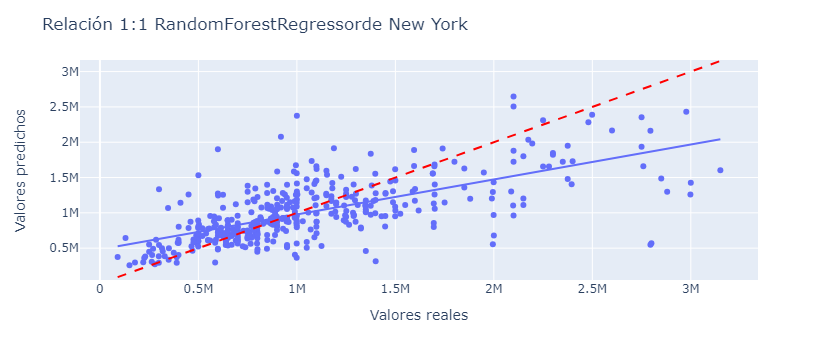

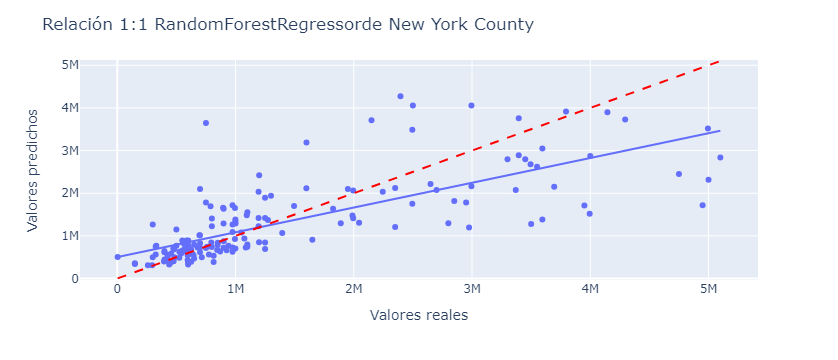

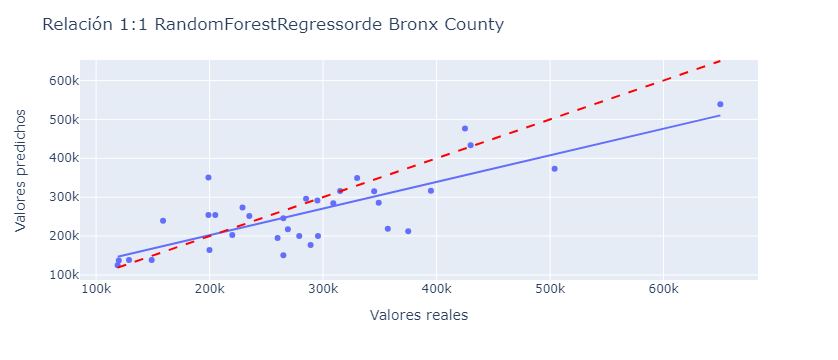

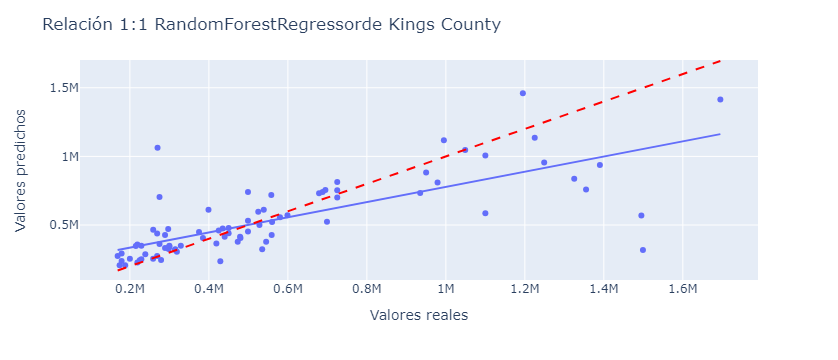

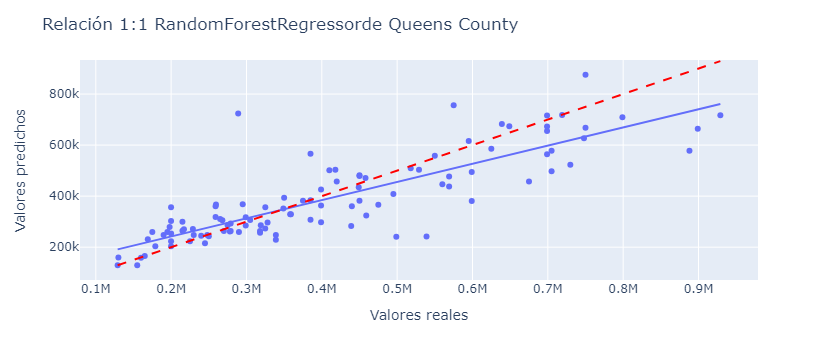

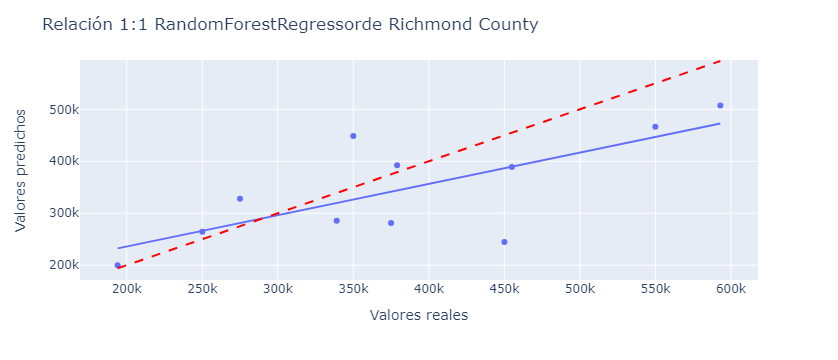

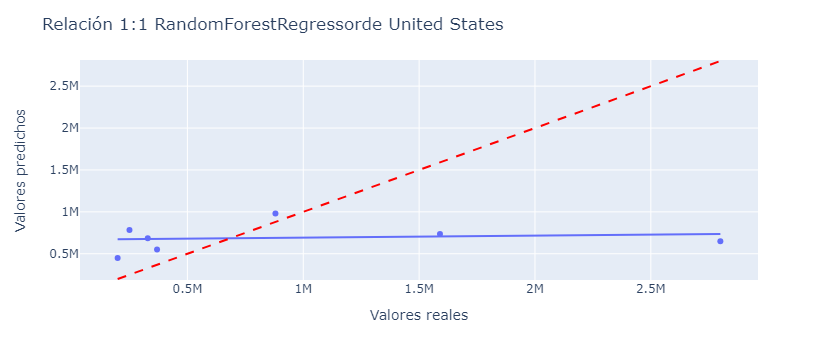

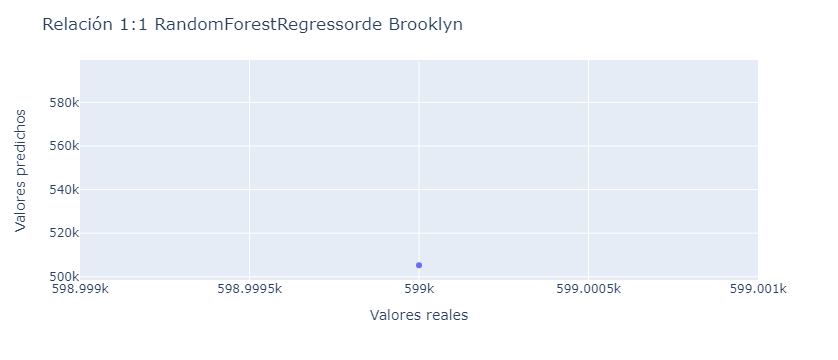

In [40]:
scores_df_OUTLIERS = pd.DataFrame(columns=['LOCALITY', 'mse', 'rmse',"mae","r2"])
from sklearn.ensemble import RandomForestRegressor
y_predLIST = []
for LOCALITY in data["LOCALITY"].unique():
    
    subset = data[data["LOCALITY"]==LOCALITY]
    subset = remove_outliers(subset,"PRICE")
    
    X = subset[["TYPE_encoded","BEDS_encoded","BATH_encoded","STATE_encoded","ADMINISTRATIVE_AREA_LEVEL_2_encoded",
          "LOCALITY_encoded","SUBLOCALITY_encoded","STREET_NAME_encoded","PROPERTYSQFT"]]

    y = subset["PRICE"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cat_features = ["TYPE_encoded","BEDS_encoded","BATH_encoded","STATE_encoded","ADMINISTRATIVE_AREA_LEVEL_2_encoded",
              "LOCALITY_encoded","SUBLOCALITY_encoded","STREET_NAME_encoded"]
    num_features = ["PROPERTYSQFT"]

    
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=30)
    #display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




    #creo pileline para las variables numericas
    numeric_transformer = Pipeline(
                          steps=[("imputer", SimpleImputer(strategy="mean",add_indicator= True)), 
                                 ("scaler", StandardScaler())]
                          )
    #missing_values='NaN'


    #creo pileline para las variables categóricas
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value = 0)),
            ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
    )


    # rear un objeto utilizando la clase ColumnTransformer que nos permite realizar transformaciones en las columnas, que justamente es lo que buscamos
    column_processor = ColumnTransformer(
        transformers=[
            ("numéricas", numeric_transformer, num_features),
            ("categóricas", categorical_transformer, cat_features),
        ]
    )


    XGB_pipe = Pipeline(
        steps=[("preprocessor", column_processor), ("classifier", RandomForestRegressor())]
    )


    XGB_pipe.fit(X_train,y_train)
    y_pred = XGB_pipe.predict(X_test)
     

    mse = mean_squared_error(y_test, y_pred)

    # Calcular la Raíz del Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mse)

    # Calcular el Error Absoluto Medio (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calcular el Coeficiente de Determinación (R²)
    r2 = r2_score(y_test, y_pred)

    
    scores_df_OUTLIERS = scores_df_OUTLIERS.append({
                                      'LOCALITY' : LOCALITY, 
                                      'mse' : mse,
                                      'rmse' : rmse,
                                      "mae" : mae,
                                      
                                      "r2" : f"{r2}"
                                      }, 
                                     ignore_index=True)
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    # Crear el gráfico con Plotly Express
    fig = px.scatter(df, x='y_test', y='y_pred', trendline='ols', labels={'y_test': 'Valores reales', 'y_pred': 'Valores predichos'})

    # Agregar una línea de 45 grados
    fig.add_shape(
        type='line',
        line=dict(dash='dash', color='red'),
        x0=min(df['y_test']),
        x1=max(df['y_test']),
        y0=min(df['y_test']),
        y1=max(df['y_test'])
    )
    
    # Configuración del gráfico
    fig.update_layout(title=f'Relación 1:1 RandomForestRegressorde {LOCALITY}')

    # Mostrar el gráfico
    fig.show()

In [41]:
scores_df_OUTLIERS

LOCALITY                mse       rmse        mae  \
0         New York 190,948,309,967.80 436,976.33 294,472.02   
1  New York County 663,382,926,500.81 814,483.23 519,056.91   
2     Bronx County   5,375,434,664.29  73,317.36  56,334.89   
3     Kings County  62,338,577,931.33 249,676.95 142,853.49   
4    Queens County  11,317,306,757.92 106,382.83  73,419.79   
5  Richmond County   7,772,238,276.49  88,160.30  70,279.54   
6    United States 838,115,089,955.41 915,486.26 631,883.97   
7         Brooklyn   8,783,438,400.00  93,720.00  93,720.00   

                      r2  
0     0.4365973703620927  
1     0.5446245271167188  
2     0.5695111872192127  
3      0.548342796522445  
4     0.7035020134727819  
5    0.42942911534515893  
6  -0.046439069381013054  
7                    nan